In [85]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import pickle
from PIL import Image

import matplotlib.pyplot as plt
import hmax
import numpy as np
import pandas as pd

In [110]:
#test data download
eye_movements_df = pd.read_excel('./data/eye_movements/sample_data1(dynamics).xlsx', decimal='\t')

x = np.array(eye_movements_df['Point of Regard Right X [px]'])
y = np.array(eye_movements_df['Point of Regard Right Y [px]'])



In [103]:
[l.split('-') for l in ','.join(x)]

TypeError: sequence item 1: expected str instance, float found

In [97]:
eye_movements_df

,RecordingTime [ms],Time of Day [h:m:s:ms],Trial,Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],Participant,Color,Tracking Ratio [%],Category Group,Pupil Diameter Right [mm],Point of Regard Right X [px],Point of Regard Right Y [px],Gaze Vector Right X,Gaze Vector Right Y,Gaze Vector Right Z
0,1798649.3,17:21:37:896,Trial136,5_01.jpg,0,2000.0,anna_kuchenkova,CornflowerBlue,90.6,Information,-,-,-,-,-,-
1,1798650.8,17:21:37:897,Trial136,5_01.jpg,0,2000.0,anna_kuchenkova,CornflowerBlue,90.6,Eye,4.7,1616.4,466,0.4,0.3,-0.9
2,1798652.2,17:21:37:899,Trial136,5_01.jpg,0,2000.0,anna_kuchenkova,CornflowerBlue,90.6,Eye,4.7,1615.9,466.2,0.4,0.3,-0.9
3,1798653.5,17:21:37:900,Trial136,5_01.jpg,0,2000.0,anna_kuchenkova,CornflowerBlue,90.6,Eye,4.7,1611.4,465.5,0.4,0.3,-0.9
4,1798655.5,17:21:37:902,Trial136,5_01.jpg,0,2000.0,anna_kuchenkova,CornflowerBlue,90.6,Eye,4.7,1612.6,466.4,0.4,0.3,-0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29842,7501646.4,16:51:56:436,Trial044,i5_01.jpg,0,2001.9,alexey,Brown,95.4,Eye,3.8,860.7,473.4,0,0.2,-1
29843,7501648.4,16:51:56:438,Trial044,i5_01.jpg,0,2001.9,alexey,Brown,95.4,Eye,3.8,861.5,472.3,0,0.2,-1
29844,7501650.4,16:51:56:440,Trial044,i5_01.jpg,0,2001.9,alexey,Brown,95.4,Eye,3.8,861.5,471.9,0,0.2,-1
29845,7501652.4,16:51:56:442,Trial044,i5_01.jpg,0,2001.9,alexey,Brown,95.4,Eye,3.8,861.7,471.1,0,0.2,-1


In [2]:
model = hmax.HMAX('./universal_patch_set.mat')

In [50]:
# A folder with example images
example_images = datasets.ImageFolder(
    './example_images/',
    transform=transforms.Compose([
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x * 255),
    ])
)

# A dataloader that will run through all example images in one batch
dataloader = DataLoader(example_images, batch_size=20)


In [4]:
torch.cuda.is_available()

False

In [5]:
# Determine whether there is a compatible GPU available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [6]:
# Run the model on the example images
#s2: 1st neuron; 2nd image; 3rd filter; 4th (64,64) picture;
model = model.to(device)
for X, y in dataloader:
    s1, c1, s2, c2 = model.get_all_layers(X.to(device))


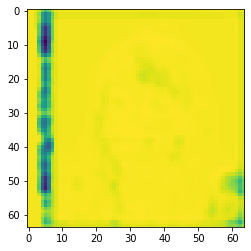

In [26]:
plt.imshow(s2[0][0][9][370])

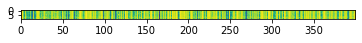

In [28]:
plt.imshow(c2[2])

In [ ]:
with open('output.pkl', 'wb') as f:
    pickle.dump(dict(s1=s1, c1=c1, s2=s2, c2=c2), f)

In [60]:
images_df = np.zeros((len(example_images),example_images[0][0][0].shape[0],example_images[0][0][0].shape[1]))
for i in range(len(example_images)):
    images_df[i,:,:] = example_images[i][0][0]

In [81]:
def pic_transform(im_df, image_param):

     new_images = np.zeros((im_df.shape[0],image_param+im_df.shape[1],image_param+im_df.shape[2]))
     for i in range(im_df.shape[0]):
         new_images[i,image_param//2:image_param//2+im_df.shape[1],image_param//2:image_param//2+im_df.shape[2]] = im_df[i,:,:]
     return new_images

def image_move(new_images, ):
    
    return 

In [82]:
new_images = pic_transform(images_df, 1000)